In [486]:
import pandas as pd
import PyPDF2
import os
import re
import numpy as np

In [300]:
#Code to work with long paths without problem 
#Taken from: https://stackoverflow.com/a/63198228/3254178
def winapi_path(dos_path, encoding=None):
    if (not isinstance(dos_path, str) and encoding is not None): 
        dos_path = dos_path.decode(encoding)
    path = os.path.abspath(dos_path)
    if path.startswith(u"\\\\"):
        return u"\\\\?\\UNC\\" + path[2:]
    return u"\\\\?\\" + path

In [614]:
File_names=os.listdir('../world_bank_loans_full_upload-20210511T002631Z-001/world_bank_loans_full_upload/')
ROOT_DIR = '../world_bank_loans_full_upload-20210511T002631Z-001/world_bank_loans_full_upload/'
file='2014_october_9_743961468114843062_official-documents-loan-agreement-for-loan-8437-sc-closing-package.pdf'
file=File_names[1234]
path=os.path.abspath(ROOT_DIR+file)
path=winapi_path(path)

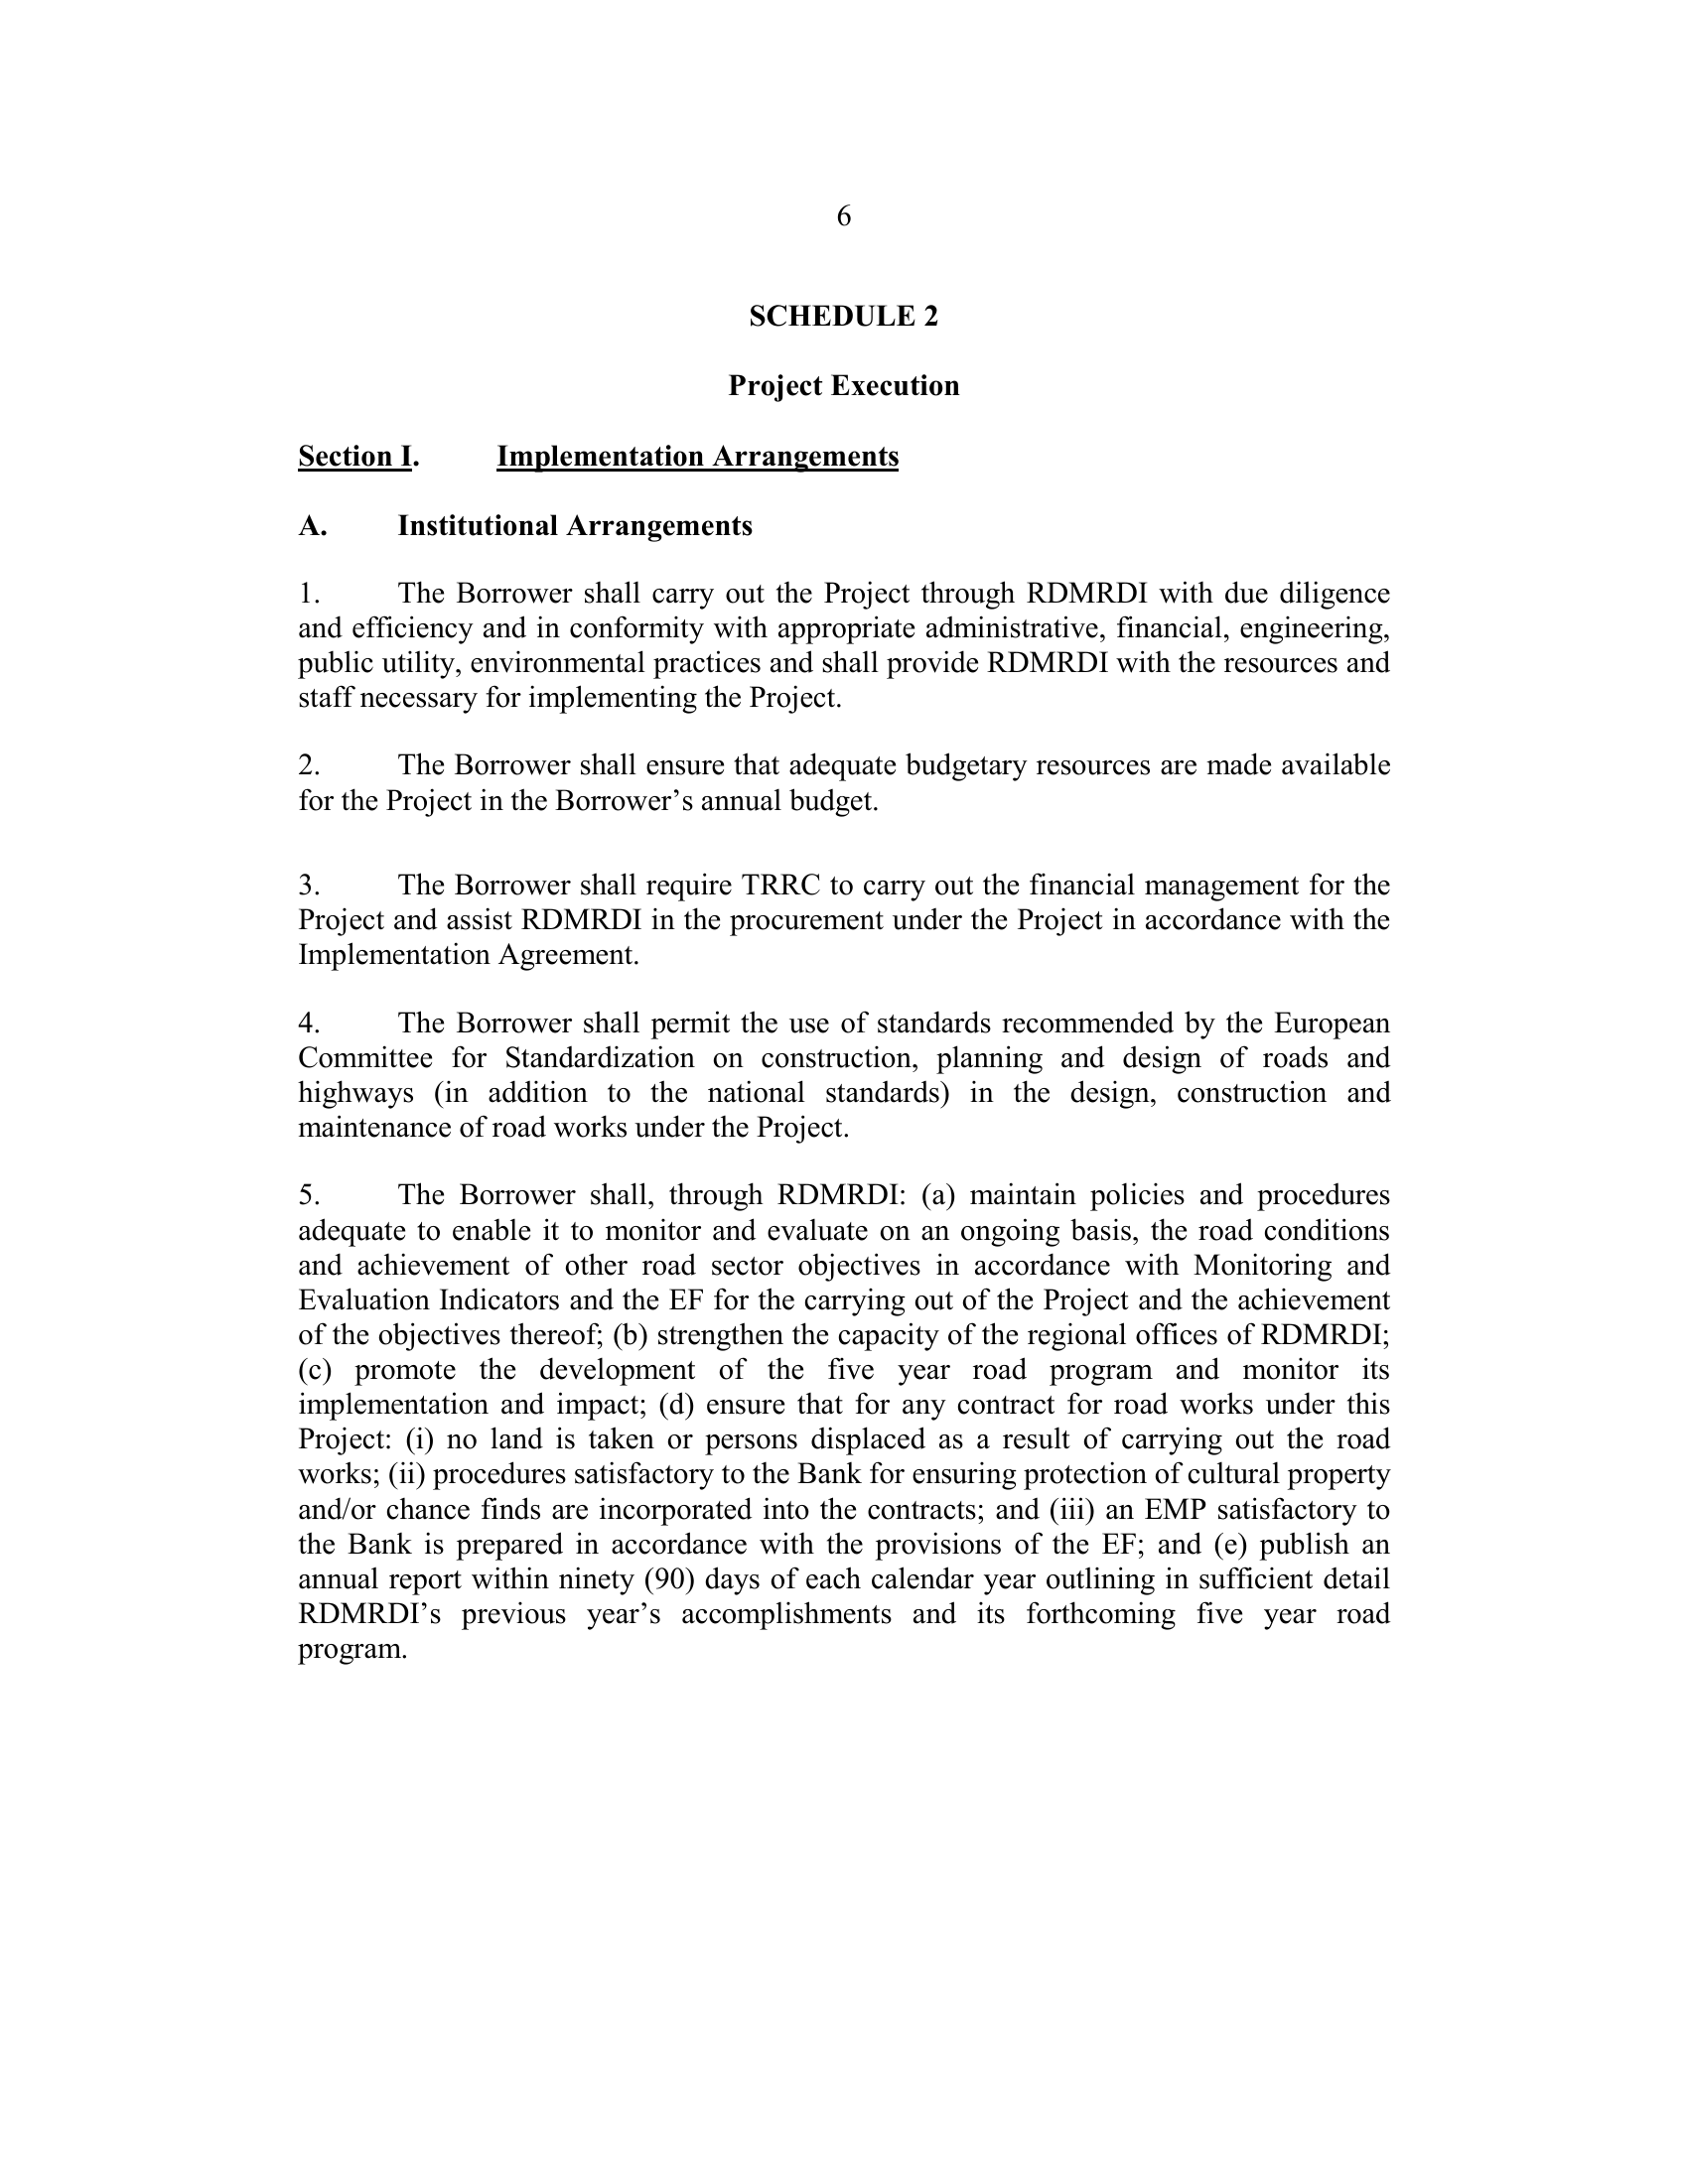

In [647]:
num_page=6
from pdf2image import convert_from_path
images=convert_from_path(path)
images[num_page]

In [648]:
import pytesseract
try:
    from PIL import Image
except ImportError:
    import Image

In [649]:
Text_from_tesseract=pytesseract.image_to_string(images[num_page])

In [650]:
#!pip install pdfminer

In [651]:
from io import StringIO

from pdfminer.converter import TextConverter
from pdfminer.layout import LAParams
from pdfminer.pdfdocument import PDFDocument
from pdfminer.pdfinterp import PDFResourceManager, PDFPageInterpreter
from pdfminer.pdfpage import PDFPage
from pdfminer.pdfparser import PDFParser

output_string = StringIO()
with open(path, 'rb') as in_file:
    parser = PDFParser(in_file)
    doc = PDFDocument(parser)
    rsrcmgr = PDFResourceManager()
    device = TextConverter(rsrcmgr, output_string, laparams=LAParams())
    interpreter = PDFPageInterpreter(rsrcmgr, device)
    pages=tuple(PDFPage.create_pages(doc))
    interpreter.process_page(pages[num_page])

Text_from_miner=output_string.getvalue()

In [652]:
def separate_lines(text):  
    text=Text_from_tesseract
    text=re.sub('[:;.](\n)','\n\n',text)
    text=re.sub('\n(?!\n)',' ',text)
    text=re.sub('\n+[\n\s]*','\n',text)
    currency_characters=u'$¢£¤¥֏؋৲৳৻૱௹฿៛\u20a0-\u20bd\ua838\ufdfc\ufe69\uff04\uffe0\uffe1\uffe5\uffe6'
    re_string='[^0-9a-zA-Z\s.\(\)'+currency_characters+']+'
    text=re.sub(re_string, '',text)
    text=text.replace('"','')
    text=re.sub('\s{2,}',' ',text)
    text=text.lower()
    lines=[line.split(' ') for line in text]
    return lines

In [653]:
Articles_miner=separate_articles(Text_from_miner)
Articles_tesseract=separate_articles(Text_from_tesseract)

In [ ]:
#Now we write a way to extract Project Name
Text